# Explore and Process Data

## Load Data

In [1]:
# import useful libraries
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
%matplotlib inline
%pylab inline

# set the path of the raw data
raw_data_path = Path.cwd().parent / 'data' / 'raw' 
labeled_file_path = raw_data_path / 'train.csv'
unlabeled_file_path = raw_data_path / 'test.csv'

# read the data with all default parameters
labeled_df = pd.read_csv(labeled_file_path, index_col = 'PassengerId')
unlabeled_df = pd.read_csv(unlabeled_file_path, index_col = 'PassengerId')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# list columns, data types, and column counts
print('Labeled:\n')
print(labeled_df.info())
print('\nUnlabeled:\n')
print(unlabeled_df.info())

Labeled:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None

Unlabeled:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3)

#### Missing Data: Age and Cabin in both sets. Embarked in labeled set and Fare in unlabeled set.

#### Numerical Data: Survived, Pclass, Age, SibSp, Parch, and Fare

#### Categorical Data: Name, Sex, Ticket, Cabin, Embarked

## Feature: Sex

In [3]:
# no missing values, so let's look at the Survived vs Sex crosstab...
print(pd.crosstab(labeled_df.Survived, labeled_df.Sex), '\n')

# ...as well as the mean Survived (proportion that survived) grouping by Sex
print(labeled_df.groupby('Sex').Survived.mean())

Sex       female  male
Survived              
0             81   468
1            233   109 

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Clearly Sex is a good predictor of survival, so let's keep it. In fact, we could build a pretty good predictor just by looking at Sex alone!

In [4]:
# one-hot encode Sex
labeled_df = pd.get_dummies(labeled_df, columns = ['Sex'], drop_first = True)
unlabeled_df = pd.get_dummies(unlabeled_df, columns = ['Sex'], drop_first = True)

In [5]:
# look at correlation matrix
corr = labeled_df.corr()
corr.style.background_gradient()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
Survived,1,-0.338481,-0.0772211,-0.0353225,0.0816294,0.257307,-0.543351
Pclass,-0.338481,1,-0.369226,0.0830814,0.0184427,-0.5495,0.1319
Age,-0.0772211,-0.369226,1,-0.308247,-0.189119,0.0960667,0.0932536
SibSp,-0.0353225,0.0830814,-0.308247,1,0.414838,0.159651,-0.114631
Parch,0.0816294,0.0184427,-0.189119,0.414838,1,0.216225,-0.245489
Fare,0.257307,-0.5495,0.0960667,0.159651,0.216225,1,-0.182333
Sex_male,-0.543351,0.1319,0.0932536,-0.114631,-0.245489,-0.182333,1


The new Sex_male column looks like a keeper.

## Feature: Pclass

In [6]:
# no missing values, so let's look at the Survived vs Pclass crosstab...
print(pd.crosstab(labeled_df.Survived, labeled_df.Pclass), '\n')

# ...as well as the mean Survived (proportion that survived) grouping by Pclass
print(labeled_df.groupby('Pclass').Survived.mean())

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


We saw in the correlation matrix above and then with the mean survival rates, Pclass looks like a good predictor of survival, so let's keep it.

In [7]:
# one-hot encode Pclass
labeled_df = pd.get_dummies(labeled_df, columns = ['Pclass'], drop_first = True)
unlabeled_df = pd.get_dummies(unlabeled_df, columns = ['Pclass'], drop_first = True)

In [8]:
# look at correlation matrix
corr = labeled_df.corr()
corr.style.background_gradient()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3
Survived,1,-0.0772211,-0.0353225,0.0816294,0.257307,-0.543351,0.0933486,-0.322308
Age,-0.0772211,1,-0.308247,-0.189119,0.0960667,0.0932536,0.00695403,-0.312271
SibSp,-0.0353225,-0.308247,1,0.414838,0.159651,-0.114631,-0.0559316,0.092548
Parch,0.0816294,-0.189119,0.414838,1,0.216225,-0.245489,-0.000733897,0.0157904
Fare,0.257307,0.0960667,0.159651,0.216225,1,-0.182333,-0.118557,-0.413333
Sex_male,-0.543351,0.0932536,-0.114631,-0.245489,-0.182333,1,-0.0647463,0.137143
Pclass_2,0.0933486,0.00695403,-0.0559316,-0.000733897,-0.118557,-0.0647463,1,-0.56521
Pclass_3,-0.322308,-0.312271,0.092548,0.0157904,-0.413333,0.137143,-0.56521,1


## Feature: SibSp and Parch

In [9]:
# look at the Survived vs SibSp, Parch crosstabs
print(pd.crosstab(labeled_df.Survived, labeled_df.SibSp))
print('\n')
print(pd.crosstab(labeled_df.Survived, labeled_df.Parch))

SibSp       0    1   2   3   4  5  8
Survived                            
0         398   97  15  12  15  5  7
1         210  112  13   4   3  0  0


Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0


In [10]:
# find mean Survived (proportion that survived) grouping by SibSp, Parch
print(labeled_df.groupby('SibSp').Survived.mean())
print('\n')
print(labeled_df.groupby('Parch').Survived.mean())

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


These two features seem to have the same behavior: if the value is 1 or 2 (or 3 for Parch), then survival rate is about 50-50, otherwise survival rate is poor. This makes sense because being alone or in a large family might make it difficult to get to a life boat.

Let's replace these features with SibSp_Even and Parch_Even, where 1 indicates that the passenger is in the 50-50 survival rate group, and 0 indicates that the passenger is in the poor survival rate group

In [11]:
def even_SibSp(x):
    return 1 if (x == 1 or x == 2) else 0

def even_Parch(x):
    return 1 if (x == 1 or x == 2 or x == 3) else 0

# create the new columns
labeled_df['SibSp_Even'] = labeled_df.SibSp.map(even_SibSp).astype(uint8)
unlabeled_df['SibSp_Even'] = unlabeled_df.SibSp.map(even_SibSp).astype(uint8)

labeled_df['Parch_Even'] = labeled_df.Parch.map(even_Parch).astype(uint8)
unlabeled_df['Parch_Even'] = unlabeled_df.Parch.map(even_Parch).astype(uint8)

In [12]:
# delete SibSp and Parch
labeled_df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
unlabeled_df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [13]:
# look at correlation matrix
corr = labeled_df.corr()
corr.style.background_gradient()

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3,SibSp_Even,Parch_Even
Survived,1,-0.0772211,0.257307,-0.543351,0.0933486,-0.322308,0.177738,0.165511
Age,-0.0772211,1,0.0960667,0.0932536,0.00695403,-0.312271,-0.0224014,-0.311985
Fare,0.257307,0.0960667,1,-0.182333,-0.118557,-0.413333,0.155653,0.229469
Sex_male,-0.543351,0.0932536,-0.182333,1,-0.0647463,0.137143,-0.188635,-0.232228
Pclass_2,0.0933486,0.00695403,-0.118557,-0.0647463,1,-0.56521,0.0882056,0.0534012
Pclass_3,-0.322308,-0.312271,-0.413333,0.137143,-0.56521,1,-0.166494,-0.0584591
SibSp_Even,0.177738,-0.0224014,0.155653,-0.188635,0.0882056,-0.166494,1,0.224085
Parch_Even,0.165511,-0.311985,0.229469,-0.232228,0.0534012,-0.0584591,0.224085,1


Great, these two new features are more strongly correlated with survival than were SibSp and Parch.

## Feature: Embarked

In [14]:
# we are only missing two values for Embarked, so let's take a look
labeled_df[labeled_df.Embarked.isnull()]

,Survived,Name,Age,Ticket,Fare,Cabin,Embarked,Sex_male,Pclass_2,Pclass_3,SibSp_Even,Parch_Even
PassengerId,,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",38.0,113572,80.0,B28,NaN,0,0,0,0,0
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,113572,80.0,B28,NaN,0,0,0,0,0


Clearly these two were traveling together and had no other family on board, perhaps an elderly woman with her handmaid? In any case, I'm going to assume they have the same value of Embarked.

The most reasonable guess is probably the mode of Embarked. However, of all the other features, it seems like Pclass might be correlated with Embarked, so let's also look at the mode of Embarked for the Pclass = 1 group.

In [15]:
# mode of Embarked
print('Mode of Embarked:')
print(labeled_df.Embarked.mode())

# they were in first class (Pclass = 1), so let's see the distribution of Embarked for Pclass = 1
print('\nDistribution of Embarked for Pclass = 1:')
print(labeled_df[labeled_df.Pclass_2 + labeled_df.Pclass_3 == 0].Embarked.value_counts())

Mode of Embarked:
0    S
dtype: object

Distribution of Embarked for Pclass = 1:
S    127
C     85
Q      2
Name: Embarked, dtype: int64


That settles it: we'll assume they embarked from S, then one-hot encode.

In [16]:
# replace nulls with S, the mode of Embarked
labeled_df.Embarked.fillna('S', inplace = True)
unlabeled_df.Embarked.fillna('S', inplace = True)

In [17]:
# now let's look at the Survived vs Embarked crosstab...
print(pd.crosstab(labeled_df.Survived, labeled_df.Embarked), '\n')

# ...as well as the mean Survived (proportion that survived) grouping by Embarked
print(labeled_df.groupby('Embarked').Survived.mean())

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219 

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


I don't really see much difference between Q and S, so we could just have one category, Embarked_C, that indicates whether or not Embarked = C.

Note: In this version of data processing, I'm going to keep all columns and let PCA sort out what's important.

In [18]:
# one-hot encode
labeled_df = pd.get_dummies(labeled_df, columns = ['Embarked'], drop_first = True)
unlabeled_df = pd.get_dummies(unlabeled_df, columns = ['Embarked'], drop_first = True)

In [19]:
# look at correlation matrix
corr = labeled_df.corr()
corr.style.background_gradient()

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3,SibSp_Even,Parch_Even,Embarked_Q,Embarked_S
Survived,1,-0.0772211,0.257307,-0.543351,0.0933486,-0.322308,0.177738,0.165511,0.00365038,-0.149683
Age,-0.0772211,1,0.0960667,0.0932536,0.00695403,-0.312271,-0.0224014,-0.311985,-0.0224048,-0.0232328
Fare,0.257307,0.0960667,1,-0.182333,-0.118557,-0.413333,0.155653,0.229469,-0.117216,-0.162184
Sex_male,-0.543351,0.0932536,-0.182333,1,-0.0647463,0.137143,-0.188635,-0.232228,-0.0741151,0.119224
Pclass_2,0.0933486,0.00695403,-0.118557,-0.0647463,1,-0.56521,0.0882056,0.0534012,-0.127301,0.18998
Pclass_3,-0.322308,-0.312271,-0.413333,0.137143,-0.56521,1,-0.166494,-0.0584591,0.237449,-0.0151043
SibSp_Even,0.177738,-0.0224014,0.155653,-0.188635,0.0882056,-0.166494,1,0.224085,-0.0585911,-0.0445521
Parch_Even,0.165511,-0.311985,0.229469,-0.232228,0.0534012,-0.0584591,0.224085,1,-0.100404,0.0228887
Embarked_Q,0.00365038,-0.0224048,-0.117216,-0.0741151,-0.127301,0.237449,-0.0585911,-0.100404,1,-0.499421
Embarked_S,-0.149683,-0.0232328,-0.162184,0.119224,0.18998,-0.0151043,-0.0445521,0.0228887,-0.499421,1


## Feature: Ticket

In [20]:
# how many distinct tickets are there?
labeled_df.Ticket.nunique()

681

In [21]:
labeled_df.Ticket.head(10)

PassengerId
1            A/5 21171
2             PC 17599
3     STON/O2. 3101282
4               113803
5               373450
6               330877
7                17463
8               349909
9               347742
10              237736
Name: Ticket, dtype: object

I have serious doubts that we can extract any information from Ticket that will predict Survived, so I'm going to just drop this column.

In [22]:
labeled_df.drop(['Ticket'], axis = 1, inplace = True)
unlabeled_df.drop(['Ticket'], axis = 1, inplace = True)

## Feature: Cabin

In [23]:
print('Cabins in labeled set:')
print(labeled_df.sort_values(by = 'Cabin')['Cabin'].unique())
print('\nCabins in unlabeled set:')
print(unlabeled_df.sort_values(by = 'Cabin')['Cabin'].unique())

Cabins in labeled set:
['A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34' 'A36'
 'A5' 'A6' 'A7' 'B101' 'B102' 'B18' 'B19' 'B20' 'B22' 'B28' 'B3' 'B30'
 'B35' 'B37' 'B38' 'B39' 'B4' 'B41' 'B42' 'B49' 'B5' 'B50' 'B51 B53 B55'
 'B57 B59 B63 B66' 'B58 B60' 'B69' 'B71' 'B73' 'B77' 'B78' 'B79' 'B80'
 'B82 B84' 'B86' 'B94' 'B96 B98' 'C101' 'C103' 'C104' 'C106' 'C110' 'C111'
 'C118' 'C123' 'C124' 'C125' 'C126' 'C128' 'C148' 'C2' 'C22 C26'
 'C23 C25 C27' 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C52' 'C54'
 'C62 C64' 'C65' 'C68' 'C7' 'C70' 'C78' 'C82' 'C83' 'C85' 'C86' 'C87'
 'C90' 'C91' 'C92' 'C93' 'C95' 'C99' 'D' 'D10 D12' 'D11' 'D15' 'D17' 'D19'
 'D20' 'D21' 'D26' 'D28' 'D30' 'D33' 'D35' 'D36' 'D37' 'D45' 'D46' 'D47'
 'D48' 'D49' 'D50' 'D56' 'D6' 'D7' 'D9' 'E10' 'E101' 'E12' 'E121' 'E17'
 'E24' 'E25' 'E31' 'E33' 'E34' 'E36' 'E38' 'E40' 'E44' 'E46' 'E49' 'E50'
 'E58' 'E63' 'E67' 'E68' 'E77' 'E8' 'F E69' 'F G63' 'F G73' 'F2' 'F33'
 'F38' 'F4' 'G6' 'T' nan]

Cabins in unlabeled

It looks like we have a letter (probably the deck) followed by a number (probably the room). I doubt the room number is useful, but maybe the deck letter will be. Let's extract the deck letter (and store it in the variable Deck), and replace NaN with U (for unknown).

In [24]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'U')

labeled_df['Deck'] = labeled_df['Cabin'].map(get_deck)
unlabeled_df['Deck'] = unlabeled_df['Cabin'].map(get_deck)

In [25]:
# now let's look at the Survived vs Deck crosstab...
print(pd.crosstab(labeled_df.Survived, labeled_df.Deck), '\n')

# ...as well as the mean Survived (proportion that survived) grouping by Deck
print(labeled_df.groupby('Deck').Survived.mean())

Deck      A   B   C   D   E  F  G  T    U
Survived                                 
0         8  12  24   8   8  5  2  1  481
1         7  35  35  25  24  8  2  0  206 

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
U    0.299854
Name: Survived, dtype: float64


It seems that: Decks T and U have a poor survival rate, Decks A and G have basically a 50-50 chance of survival, Decks B, D, and E are much more likely to survive than not, and Decks C and F have a fair chance of survival (though not as good as Decks B, D, and E).

Let's group Decks according to the following:

Good: B, D, E

Fair: C, F

Even: A, G

Poor: T, U

In [26]:
def get_deck_group(deck):
    deck_group = {
        'A' : 'Even',
        'B' : 'Good',
        'C' : 'Fair',
        'D' : 'Good',
        'E' : 'Good',
        'F' : 'Fair',
        'G' : 'Even',
        'T' : 'Poor',
        'U' : 'Poor'
    }
    return deck_group[deck]

# how many in each Deck group?
labeled_df.Deck.map(get_deck_group).value_counts()

Poor    688
Good    112
Fair     72
Even     19
Name: Deck, dtype: int64

In [27]:
# create and popluate Deck_Group column
labeled_df['Deck_Group'] = labeled_df.Deck.map(get_deck_group)
unlabeled_df['Deck_Group'] = unlabeled_df.Deck.map(get_deck_group)

# one-hot encode
labeled_df = pd.get_dummies(labeled_df, columns = ['Deck_Group'])
unlabeled_df = pd.get_dummies(unlabeled_df, columns = ['Deck_Group'])

# can drop Cabin, Deck, and Deck_Group_Even (since we can determine Deck_Group_Even from the other deck groups)
labeled_df.drop(['Cabin', 'Deck', 'Deck_Group_Even'], axis = 1, inplace = True)
unlabeled_df.drop(['Cabin', 'Deck', 'Deck_Group_Even'], axis = 1, inplace = True)

In [28]:
# look at correlation matrix
corr = labeled_df.corr()
corr.style.background_gradient()

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3,SibSp_Even,Parch_Even,Embarked_Q,Embarked_S,Deck_Group_Fair,Deck_Group_Good,Deck_Group_Poor
Survived,1,-0.0772211,0.257307,-0.543351,0.0933486,-0.322308,0.177738,0.165511,0.00365038,-0.149683,0.130096,0.28549,-0.319572
Age,-0.0772211,1,0.0960667,0.0932536,0.00695403,-0.312271,-0.0224014,-0.311985,-0.0224048,-0.0232328,0.07489,0.211221,-0.246798
Fare,0.257307,0.0960667,1,-0.182333,-0.118557,-0.413333,0.155653,0.229469,-0.117216,-0.162184,0.317839,0.346952,-0.482732
Sex_male,-0.543351,0.0932536,-0.182333,1,-0.0647463,0.137143,-0.188635,-0.232228,-0.0741151,0.119224,-0.0571196,-0.145489,0.142608
Pclass_2,0.0933486,0.00695403,-0.118557,-0.0647463,1,-0.56521,0.0882056,0.0534012,-0.127301,0.18998,-0.0698754,-0.12653,0.171347
Pclass_3,-0.322308,-0.312271,-0.413333,0.137143,-0.56521,1,-0.166494,-0.0584591,0.237449,-0.0151043,-0.287103,-0.399679,0.53726
SibSp_Even,0.177738,-0.0224014,0.155653,-0.188635,0.0882056,-0.166494,1,0.224085,-0.0585911,-0.0445521,0.119745,0.0705566,-0.127192
Parch_Even,0.165511,-0.311985,0.229469,-0.232228,0.0534012,-0.0584591,0.224085,1,-0.100404,0.0228887,0.0451236,0.084611,-0.100477
Embarked_Q,0.00365038,-0.0224048,-0.117216,-0.0741151,-0.127301,0.237449,-0.0585911,-0.100404,1,-0.499421,-0.0472245,-0.104571,0.128973
Embarked_S,-0.149683,-0.0232328,-0.162184,0.119224,0.18998,-0.0151043,-0.0445521,0.0228887,-0.499421,1,-0.047978,-0.0773632,0.102962


## Feature: Name (and filling in missing Age values)

In [29]:
# take a look at Name format
labeled_df.Name.head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

It looks like each passenger has a title, which might give us some predictive power. With that said, a passenger's name is unlikely to be helpful, so let's extract the title and discard the name.

In [30]:
def get_title(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

# how many of each title?
print('Titles in labeled set:')
print(labeled_df.Name.map(get_title).value_counts())
print('\nTitles in unlabeled set:')
print(unlabeled_df.Name.map(get_title).value_counts())

Titles in labeled set:
mr              517
miss            182
mrs             125
master           40
dr                7
rev               6
mlle              2
major             2
col               2
capt              1
lady              1
don               1
jonkheer          1
sir               1
the countess      1
mme               1
ms                1
Name: Name, dtype: int64

Titles in unlabeled set:
mr        240
miss       78
mrs        72
master     21
rev         2
col         2
ms          1
dr          1
dona        1
Name: Name, dtype: int64


In [31]:
# create Title column
labeled_df['Title'] = labeled_df.Name.map(get_title)
unlabeled_df['Title'] = unlabeled_df.Name.map(get_title)

Before we do anything else with Title, let's use it to fill in missing Age values. The idea is that a passenger's title might indicate age (e.g., master is likely to be younger than a mr).

We want to calculate the median Age by Title, then write a function to replace NaN with the appropriate median value. So let's see which values of Title we need to worry about.

In [32]:
df = labeled_df[labeled_df.Age.isnull()]
print('Titles for labeled passengers with missing Age:', df.Title.unique())

df = unlabeled_df[unlabeled_df.Age.isnull()]
print('Titles for unlabeled passengers with missing Age:', df.Title.unique())

Titles for labeled passengers with missing Age: ['mr' 'mrs' 'miss' 'master' 'dr']
Titles for unlabeled passengers with missing Age: ['mr' 'mrs' 'miss' 'ms' 'master']


Fortunately there aren't many, so I'll just write a simple function to handle this. I'm sure there is a nicer way to do this.

In [33]:
# create groups by Title and print median Age
labeled_df.groupby('Title').Age.median()

Title
capt            70.0
col             58.0
don             40.0
dr              46.5
jonkheer        38.0
lady            48.0
major           48.5
master           3.5
miss            21.0
mlle            24.0
mme             24.0
mr              30.0
mrs             35.0
ms              28.0
rev             46.5
sir             49.0
the countess    33.0
Name: Age, dtype: float64

In [34]:
def get_age(age, title):
    title_age_dict = {'mr' : 30.0, 'mrs' : 35.0, 'miss' : 21.0, 'master' : 3.5, 'dr' : 46.5, 'ms' : 28.0}
    return title_age_dict[title] if isnan(age) else age

In [35]:
# replace NaN in Age with corresponding group Age median
labeled_df['Age'] = np.vectorize(get_age)(labeled_df['Age'], labeled_df['Title'])
unlabeled_df['Age'] = np.vectorize(get_age)(unlabeled_df['Age'], unlabeled_df['Title'])

Now back to Title. We have too many values so we should try to group some of them together.

In [36]:
# let's look at the Survived vs Title crosstab...
print(pd.crosstab(labeled_df.Survived, labeled_df.Title), '\n')

# ...as well as the mean Survived (proportion that survived) grouping by Title
print(labeled_df.groupby('Title').Survived.mean())

Title     capt  col  don  dr  jonkheer  lady  major  master  miss  mlle  mme  \
Survived                                                                       
0            1    1    1   4         1     0      1      17    55     0    0   
1            0    1    0   3         0     1      1      23   127     2    1   

Title      mr  mrs  ms  rev  sir  the countess  
Survived                                        
0         436   26   0    6    0             0  
1          81   99   1    0    1             1   

Title
capt            0.000000
col             0.500000
don             0.000000
dr              0.428571
jonkheer        0.000000
lady            1.000000
major           0.500000
master          0.575000
miss            0.697802
mlle            1.000000
mme             1.000000
mr              0.156673
mrs             0.792000
ms              1.000000
rev             0.000000
sir             1.000000
the countess    1.000000
Name: Survived, dtype: float64


Note that in 1912, Title would be indicate Sex, so I want to try to group these in such a way that we have some further stratification (beyond just Sex). Some titles indicate Age (e.g., Master is for young boys that aren't yet ready to be called Mr), others indicate royalty (e.g., Countess), etc.

I don't really have a lot of faith that Title adds anything, but I'll keep it for now with the following groups:

Soldier: capt, col, major

Royal: jonkheer, lady, sir, the countess

Mr: mr, don

Mrs: mme, mrs, ms, dona

Miss: miss, mlle

Master: master

Doctor: dr

Reverend: rev 

In [37]:
def get_title_group(title):
    title_group = {
        'capt' : 'Officer',
        'col' : 'Officer',
        'major' : 'Officer',
        'jonkheer' : 'Royal',
        'lady' : 'Royal',
        'sir' : 'Royal',
        'the countess' : 'Royal',
        'mr' : 'Mr',
        'don' : 'Mr',
        'dona' : 'Mrs',
        'mme' : 'Mrs',
        'mrs' : 'Mrs',
        'ms' : 'Mrs',
        'miss' : 'Miss',
        'mlle' : 'Miss',
        'master' : 'Master',
        'dr' : 'Doctor',
        'rev' : 'Reverend'}
    return title_group[title]

# how many in each title group?
labeled_df.Title.map(get_title_group).value_counts()

Mr          518
Miss        184
Mrs         127
Master       40
Doctor        7
Reverend      6
Officer       5
Royal         4
Name: Title, dtype: int64

In [38]:
# create Status column (Status is short than Title_Group)
labeled_df['Status'] = labeled_df.Title.map(get_title_group)
unlabeled_df['Status'] = unlabeled_df.Title.map(get_title_group)

In [39]:
# let's look at the Survived vs Status crosstab...
print(pd.crosstab(labeled_df.Survived, labeled_df.Status), '\n')

# ...as well as the mean Survived (proportion that survived) grouping by Status
print(labeled_df.groupby('Status').Survived.mean())

Status    Doctor  Master  Miss   Mr  Mrs  Officer  Reverend  Royal
Survived                                                          
0              4      17    55  437   26        3         6      1
1              3      23   129   81  101        2         0      3 

Status
Doctor      0.428571
Master      0.575000
Miss        0.701087
Mr          0.156371
Mrs         0.795276
Officer     0.400000
Reverend    0.000000
Royal       0.750000
Name: Survived, dtype: float64


OK, good enough, so let's drop Name and Title, then one-hot encode Status.

In [46]:
# make sure we'll have the same set of columns after one-hot encoding
print(labeled_df.Status.unique())
print(unlabeled_df.Status.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Reverend' 'Doctor' 'Officer' 'Royal']
['Mr' 'Mrs' 'Miss' 'Master' 'Officer' 'Reverend' 'Doctor']


In [47]:
# one-hot encode
labeled_df = pd.get_dummies(labeled_df, columns = ['Status'])
unlabeled_df = pd.get_dummies(unlabeled_df, columns = ['Status'])

# drop Name, Title, and Status_Royal (since unlabeled has no Royals)
labeled_df.drop(['Name', 'Title', 'Status_Royal'], axis = 1, inplace = True)
unlabeled_df.drop(['Name', 'Title'], axis = 1, inplace = True)

In [48]:
# look at correlation matrix
corr = labeled_df.corr()
corr.style.background_gradient()

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3,SibSp_Even,Parch_Even,Embarked_Q,Embarked_S,Deck_Group_Fair,Deck_Group_Good,Deck_Group_Poor,Status_Doctor,Status_Master,Status_Miss,Status_Mr,Status_Mrs,Status_Officer,Status_Reverend
Survived,1,-0.0788158,0.257307,-0.543351,0.0933486,-0.322308,0.177738,0.165511,0.00365038,-0.149683,0.130096,0.28549,-0.319572,0.00818521,0.0852206,0.332795,-0.551199,0.344935,0.0024965,-0.0649877
Age,-0.0788158,1,0.0979443,0.10482,0.015273,-0.303578,-0.017158,-0.305779,-0.0628303,0.00354154,0.0760457,0.209597,-0.241026,0.0889512,-0.407567,-0.297962,0.217648,0.191645,0.154177,0.0855594
Fare,0.257307,0.0979443,1,-0.182333,-0.118557,-0.413333,0.155653,0.229469,-0.117216,-0.162184,0.317839,0.346952,-0.482732,0.030395,0.0109084,0.120829,-0.184039,0.105665,0.00879674,-0.0230306
Sex_male,-0.543351,0.10482,-0.182333,1,-0.0647463,0.137143,-0.188635,-0.232228,-0.0741151,0.119224,-0.0571196,-0.145489,0.142608,0.0390344,0.159934,-0.691548,0.869335,-0.552686,0.0554173,0.0607409
Pclass_2,0.0933486,0.015273,-0.118557,-0.0647463,1,-0.56521,0.0882056,0.0534012,-0.127301,0.18998,-0.0698754,-0.12653,0.171347,0.0174114,0.00990312,-0.0273815,-0.089763,0.125093,-0.0383237,0.1614
Pclass_3,-0.322308,-0.303578,-0.413333,0.137143,-0.56521,1,-0.166494,-0.0584591,0.237449,-0.0151043,-0.287103,-0.399679,0.53726,-0.0985902,0.064918,0.00336584,0.153444,-0.18063,-0.0832298,-0.0912252
SibSp_Even,0.177738,-0.017158,0.155653,-0.188635,0.0882056,-0.166494,1,0.224085,-0.0585911,-0.0445521,0.119745,0.0705566,-0.127192,0.00397161,0.0657516,-0.0561135,-0.209986,0.321273,-0.0112197,-0.0185091
Parch_Even,0.165511,-0.305779,0.229469,-0.232228,0.0534012,-0.0584591,0.224085,1,-0.100404,0.0228887,0.0451236,0.084611,-0.100477,-0.0483367,0.386205,0.145944,-0.37435,0.153578,-0.00498514,-0.0120077
Embarked_Q,0.00365038,-0.0628303,-0.117216,-0.0741151,-0.127301,0.237449,-0.0585911,-0.100404,1,-0.499421,-0.0472245,-0.104571,0.128973,0.0178735,0.0104784,0.16872,-0.0790665,-0.0911211,-0.0231048,0.0235154
Embarked_S,-0.149683,0.00354154,-0.162184,0.119224,0.18998,-0.0151043,-0.0445521,0.0228887,-0.499421,1,-0.047978,-0.0773632,0.102962,-0.030612,0.0242644,-0.139126,0.109217,-0.000564872,0.0126138,0.0199725


## Feature: Fare

In [49]:
# we are only missing one value of Fare in the unlabeled data
unlabeled_df[unlabeled_df.Fare.isnull()]

,Age,Fare,Sex_male,Pclass_2,Pclass_3,SibSp_Even,Parch_Even,Embarked_Q,Embarked_S,Deck_Group_Fair,Deck_Group_Good,Deck_Group_Poor,Status_Doctor,Status_Master,Status_Miss,Status_Mr,Status_Mrs,Status_Officer,Status_Reverend
PassengerId,,,,,,,,,,,,,,,,,,,
1044,60.5,NaN,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [50]:
# this passenger has Status = Mr and Pclass = 3, so let's impute with the median Fare value for this group
m = labeled_df[(labeled_df.Status_Mr == 1) & (labeled_df.Pclass_3 == 1)].Fare.median()
unlabeled_df.Fare.fillna(m, inplace = True)

Fare is a continuous variable, so we should look at its distribution and consider rescaling and/or binning.

In [51]:
# summary statistics
labeled_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

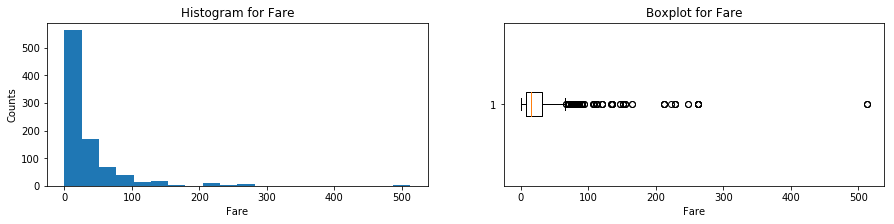

In [52]:
# histogram and boxplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 3))

ax1.hist(labeled_df.Fare, bins = 20)
ax1.set_title('Histogram for Fare')
ax1.set_xlabel('Fare')
ax1.set_ylabel('Counts')

ax2.boxplot(labeled_df.Fare, vert = False)
ax2.set_title('Boxplot for Fare')
ax2.set_xlabel('Fare')

plt.show()

Lots of outliers, so let's bin Fare using percentiles.

In [53]:
# let's cut Fare up into quartiles
num_of_bins = 4
labeled_df['Fare_Bin'] = pd.qcut(labeled_df.Fare, num_of_bins, labels = range(num_of_bins))

In [54]:
# let's look at the Survived vs Fare_Bin crosstab...
print(pd.crosstab(labeled_df.Survived, labeled_df.Fare_Bin), '\n')

# ...as well as the mean Survived (proportion that survived) grouping by Fare_Bin
print(labeled_df.groupby('Fare_Bin').Survived.mean())

Fare_Bin    0    1    2    3
Survived                    
0         179  121   93  156
1          44  101  129   68 

Fare_Bin
0    0.197309
1    0.303571
2    0.454955
3    0.581081
Name: Survived, dtype: float64


These bins certainly have distinct survival rates, and we don't want to greatly increase the number of features, so let's stick with quartiles.

In [55]:
# function to convert Fare into bins (need for unlabeled data)
q1 = np.percentile(labeled_df.Fare, 25)
q2 = np.percentile(labeled_df.Fare, 50)
q3 = np.percentile(labeled_df.Fare, 75)

def get_fare_bin(fare):
    if fare < q1:
        return 0
    elif fare < q2:
        return 1
    elif fare < q3:
        return 2
    else:
        return 3

In [56]:
# using quartiles from labeled data, create Fare_Bin in labeled and unlabeled data
labeled_df['Fare_Bin'] = labeled_df.Fare.map(get_fare_bin)
unlabeled_df['Fare_Bin'] = unlabeled_df.Fare.map(get_fare_bin)

# one-hot encode
labeled_df = pd.get_dummies(labeled_df, columns = ['Fare_Bin'], drop_first = True)
unlabeled_df = pd.get_dummies(unlabeled_df, columns = ['Fare_Bin'], drop_first = True)

# can drop Fare
labeled_df.drop(['Fare'], axis = 1, inplace = True)
unlabeled_df.drop(['Fare'], axis = 1, inplace = True)

In [57]:
# look at correlation matrix
corr = labeled_df.corr()
corr.style.background_gradient()

,Survived,Age,Sex_male,Pclass_2,Pclass_3,SibSp_Even,Parch_Even,Embarked_Q,Embarked_S,Deck_Group_Fair,Deck_Group_Good,Deck_Group_Poor,Status_Doctor,Status_Master,Status_Miss,Status_Mr,Status_Mrs,Status_Officer,Status_Reverend,Fare_Bin_1,Fare_Bin_2,Fare_Bin_3
Survived,1,-0.0788158,-0.543351,0.0933486,-0.322308,0.177738,0.165511,0.00365038,-0.149683,0.130096,0.28549,-0.319572,0.00818521,0.0852206,0.332795,-0.551199,0.344935,0.0024965,-0.0649877,-0.0876028,0.070293,0.237104
Age,-0.0788158,1,0.10482,0.015273,-0.303578,-0.017158,-0.305779,-0.0628303,0.00354154,0.0760457,0.209597,-0.241026,0.0889512,-0.407567,-0.297962,0.217648,0.191645,0.154177,0.0855594,-0.011292,-0.0404411,0.101346
Sex_male,-0.543351,0.10482,1,-0.0647463,0.137143,-0.188635,-0.232228,-0.0741151,0.119224,-0.0571196,-0.145489,0.142608,0.0390344,0.159934,-0.691548,0.869335,-0.552686,0.0554173,0.0607409,0.0792214,-0.0937079,-0.176864
Pclass_2,0.0933486,0.015273,-0.0647463,1,-0.56521,0.0882056,0.0534012,-0.127301,0.18998,-0.0698754,-0.12653,0.171347,0.0174114,0.00990312,-0.0273815,-0.089763,0.125093,-0.0383237,0.1614,0.26605,0.148658,-0.156124
Pclass_3,-0.322308,-0.303578,0.137143,-0.56521,1,-0.166494,-0.0584591,0.237449,-0.0151043,-0.287103,-0.399679,0.53726,-0.0985902,0.064918,0.00336584,0.153444,-0.18063,-0.0832298,-0.0912252,0.060029,-0.0857833,-0.431026
SibSp_Even,0.177738,-0.017158,-0.188635,0.0882056,-0.166494,1,0.224085,-0.0585911,-0.0445521,0.119745,0.0705566,-0.127192,0.00397161,0.0657516,-0.0561135,-0.209986,0.321273,-0.0112197,-0.0185091,-0.229138,0.267871,0.234741
Parch_Even,0.165511,-0.305779,-0.232228,0.0534012,-0.0584591,0.224085,1,-0.100404,0.0228887,0.0451236,0.084611,-0.100477,-0.0483367,0.386205,0.145944,-0.37435,0.153578,-0.00498514,-0.0120077,-0.202235,0.218381,0.269377
Embarked_Q,0.00365038,-0.0628303,-0.0741151,-0.127301,0.237449,-0.0585911,-0.100404,1,-0.499421,-0.0472245,-0.104571,0.128973,0.0178735,0.0104784,0.16872,-0.0790665,-0.0911211,-0.0231048,0.0235154,-0.118679,-0.0140537,-0.16038
Embarked_S,-0.149683,0.00354154,0.119224,0.18998,-0.0151043,-0.0445521,0.0228887,-0.499421,1,-0.047978,-0.0773632,0.102962,-0.030612,0.0242644,-0.139126,0.109217,-0.000564872,0.0126138,0.0199725,0.249879,-0.0165015,-0.0933297
Deck_Group_Fair,0.130096,0.0760457,-0.0571196,-0.0698754,-0.287103,0.119745,0.0451236,-0.0472245,-0.047978,1,-0.112425,-0.545846,0.0202594,0.015267,0.0115089,-0.0655986,0.0675825,0.0328537,-0.0244134,-0.139455,-0.0119503,0.282633


## Feature: Age

Fare is a continuous variable, so we should look at its distribution and consider rescaling and/or binning.

In [58]:
# summary statistics
labeled_df.Age.describe()

count    891.000000
mean      29.390202
std       13.265322
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

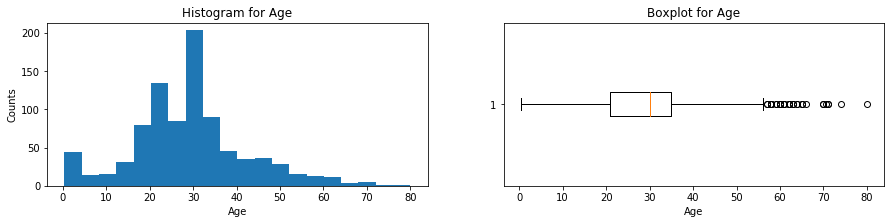

In [59]:
# histogram and boxplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 3))

ax1.hist(labeled_df.Age, bins = 20)
ax1.set_title('Histogram for Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Counts')

ax2.boxplot(labeled_df.Age, vert = False)
ax2.set_title('Boxplot for Age')
ax2.set_xlabel('Age')

plt.show()

Not as bad as Fare, but we still have some outliers. Before we try scaling or binning, let's just look at a plot of Age vs. Survival.

In [60]:
# create Age_Bin
labeled_df['Age_Bin'] = labeled_df.Age.map(int)
unlabeled_df['Age_Bin'] = unlabeled_df.Age.map(int)

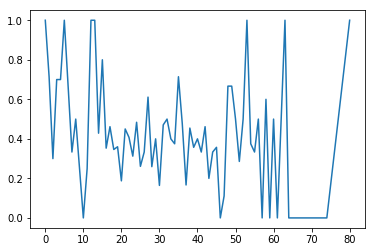

In [61]:
# plot Age_Bin vs Survived
plt.plot(labeled_df.groupby('Age_Bin').Survived.mean())
plt.show()

This just looks too random for me. However, I'm keeping everything this time and letting PCA work its magic. I see no sensible way to bin, so let's just rescale to 0-1.

In [68]:
# max and mins
m = min(labeled_df.Age.min(), unlabeled_df.Age.min())
M = max(labeled_df.Age.max(), unlabeled_df.Age.max())
print(m, M)

0.17 80.0


In [69]:
# create Age_Scale column
labeled_df['Age_Scaled'] = labeled_df.Age.map(lambda x : (x - m) / (M - m))
unlabeled_df['Age_Scaled'] = unlabeled_df.Age.map(lambda x : (x - m) / (M - m))

# can drop Age and Age_Bin
labeled_df.drop(['Age', 'Age_Bin'], axis = 1, inplace = True)
unlabeled_df.drop(['Age', 'Age_Bin'], axis = 1, inplace = True)

## Final Check

In [70]:
# check if any nulls remain
print(labeled_df.isnull().any().any(), '\n')
print(unlabeled_df.isnull().any().any())

False 

False


In [71]:
# all columns should be numeric
print(labeled_df.info(), '\n')
print(unlabeled_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 22 columns):
Survived           891 non-null int64
Sex_male           891 non-null uint8
Pclass_2           891 non-null uint8
Pclass_3           891 non-null uint8
SibSp_Even         891 non-null uint8
Parch_Even         891 non-null uint8
Embarked_Q         891 non-null uint8
Embarked_S         891 non-null uint8
Deck_Group_Fair    891 non-null uint8
Deck_Group_Good    891 non-null uint8
Deck_Group_Poor    891 non-null uint8
Status_Doctor      891 non-null uint8
Status_Master      891 non-null uint8
Status_Miss        891 non-null uint8
Status_Mr          891 non-null uint8
Status_Mrs         891 non-null uint8
Status_Officer     891 non-null uint8
Status_Reverend    891 non-null uint8
Fare_Bin_1         891 non-null uint8
Fare_Bin_2         891 non-null uint8
Fare_Bin_3         891 non-null uint8
Age_Scaled         891 non-null float64
dtypes: float64(1), int64(1), uint8(20)
memory usage: 38.

In [72]:
# sort columns alphabetically then put Survived as the first column
columns = [column for column in labeled_df.columns if column != 'Survived']
columns = ['Survived'] + sorted(columns)
labeled_df = labeled_df[columns]

columns = unlabeled_df.columns
columns = sorted(columns)
unlabeled_df = unlabeled_df[columns]

In [73]:
# all check the column sort
print(labeled_df.columns, '\n')
print(unlabeled_df.columns)

Index(['Survived', 'Age_Scaled', 'Deck_Group_Fair', 'Deck_Group_Good',
       'Deck_Group_Poor', 'Embarked_Q', 'Embarked_S', 'Fare_Bin_1',
       'Fare_Bin_2', 'Fare_Bin_3', 'Parch_Even', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'SibSp_Even', 'Status_Doctor', 'Status_Master',
       'Status_Miss', 'Status_Mr', 'Status_Mrs', 'Status_Officer',
       'Status_Reverend'],
      dtype='object') 

Index(['Age_Scaled', 'Deck_Group_Fair', 'Deck_Group_Good', 'Deck_Group_Poor',
       'Embarked_Q', 'Embarked_S', 'Fare_Bin_1', 'Fare_Bin_2', 'Fare_Bin_3',
       'Parch_Even', 'Pclass_2', 'Pclass_3', 'Sex_male', 'SibSp_Even',
       'Status_Doctor', 'Status_Master', 'Status_Miss', 'Status_Mr',
       'Status_Mrs', 'Status_Officer', 'Status_Reverend'],
      dtype='object')


In [74]:
# one last look at correlation matrix
corr = labeled_df.corr()
corr.style.background_gradient()

,Survived,Age_Scaled,Deck_Group_Fair,Deck_Group_Good,Deck_Group_Poor,Embarked_Q,Embarked_S,Fare_Bin_1,Fare_Bin_2,Fare_Bin_3,Parch_Even,Pclass_2,Pclass_3,Sex_male,SibSp_Even,Status_Doctor,Status_Master,Status_Miss,Status_Mr,Status_Mrs,Status_Officer,Status_Reverend
Survived,1,-0.0788158,0.130096,0.28549,-0.319572,0.00365038,-0.149683,-0.0876028,0.070293,0.237104,0.165511,0.0933486,-0.322308,-0.543351,0.177738,0.00818521,0.0852206,0.332795,-0.551199,0.344935,0.0024965,-0.0649877
Age_Scaled,-0.0788158,1,0.0760457,0.209597,-0.241026,-0.0628303,0.00354154,-0.011292,-0.0404411,0.101346,-0.305779,0.015273,-0.303578,0.10482,-0.017158,0.0889512,-0.407567,-0.297962,0.217648,0.191645,0.154177,0.0855594
Deck_Group_Fair,0.130096,0.0760457,1,-0.112425,-0.545846,-0.0472245,-0.047978,-0.139455,-0.0119503,0.282633,0.0451236,-0.0698754,-0.287103,-0.0571196,0.119745,0.0202594,0.015267,0.0115089,-0.0655986,0.0675825,0.0328537,-0.0244134
Deck_Group_Good,0.28549,0.209597,-0.112425,1,-0.69805,-0.104571,-0.0773632,-0.128387,-0.0809887,0.403001,0.084611,-0.12653,-0.399679,-0.145489,0.0705566,0.0429514,-0.0495073,0.0658275,-0.124302,0.106871,0.0621572,-0.0312208
Deck_Group_Poor,-0.319572,-0.241026,-0.545846,-0.69805,1,0.128973,0.102962,0.208469,0.0706656,-0.540371,-0.100477,0.171347,0.53726,0.142608,-0.127192,-0.042588,0.0273095,-0.046791,0.14112,-0.122962,-0.102477,0.0447258
Embarked_Q,0.00365038,-0.0628303,-0.0472245,-0.104571,0.128973,1,-0.499421,-0.118679,-0.0140537,-0.16038,-0.100404,-0.127301,0.237449,-0.0741151,-0.0585911,0.0178735,0.0104784,0.16872,-0.0790665,-0.0911211,-0.0231048,0.0235154
Embarked_S,-0.149683,0.00354154,-0.047978,-0.0773632,0.102962,-0.499421,1,0.249879,-0.0165015,-0.0933297,0.0228887,0.18998,-0.0151043,0.119224,-0.0445521,-0.030612,0.0242644,-0.139126,0.109217,-0.000564872,0.0126138,0.0199725
Fare_Bin_1,-0.0876028,-0.011292,-0.139455,-0.128387,0.208469,-0.118679,0.249879,1,-0.330783,-0.329803,-0.202235,0.26605,0.060029,0.0792214,-0.229138,0.0087422,-0.0725063,-0.0117083,0.0998725,-0.0892329,-0.0426254,0.0811681
Fare_Bin_2,0.070293,-0.0404411,-0.0119503,-0.0809887,0.0706656,-0.0140537,-0.0165015,-0.330783,1,-0.338842,0.218381,0.148658,-0.0857833,-0.0937079,0.267871,0.00655828,0.122754,-0.0425104,-0.143211,0.175509,0.0597997,-0.0164604
Fare_Bin_3,0.237104,0.101346,0.282633,0.403001,-0.540371,-0.16038,-0.0933297,-0.329803,-0.338842,1,0.269377,-0.156124,-0.431026,-0.176864,0.234741,0.0360578,0.0735923,0.0863774,-0.213686,0.132484,0.0254997,-0.0162719


## Split Labeled Data into Train and Test Sets

In [75]:
# train on 80%, test on 20%
# stratify split based on Survived column
train_df, test_df = train_test_split(labeled_df,
                                     test_size = 0.2,
                                     random_state = 42,
                                     stratify = labeled_df.Survived)
print(labeled_df.shape, " = ", train_df.shape, " + ", test_df.shape)
print(unlabeled_df.shape)

(891, 22)  =  (712, 22)  +  (179, 22)
(418, 21)


In [76]:
# make sure stratification is good
print(train_df.Survived.value_counts() / len(train_df), '\n')
print(test_df.Survived.value_counts() / len(test_df))

0    0.616573
1    0.383427
Name: Survived, dtype: float64 

0    0.614525
1    0.385475
Name: Survived, dtype: float64


## Save Processed Data

In [77]:
# define file paths
processed_data_path = Path.cwd().parent / 'data' / 'processed'
write_train_processed_path = processed_data_path / 'train_processed_for_pca.csv'
write_test_processed_path = processed_data_path / 'test_processed_for_pca.csv'
write_unlabeled_processed_path = processed_data_path / 'unlabeled_processed_for_pca.csv'

In [78]:
# write files
train_df.to_csv(write_train_processed_path)
test_df.to_csv(write_test_processed_path)
unlabeled_df.to_csv(write_unlabeled_processed_path)

I should write a processing script like I did for the MNIST digit recognizer. I'll circle back and do that later, promise!